In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder

# Define a simple NN
class PlaneClassifier(nn.Module):
    def __init__(self):
        super(PlaneClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),  # input: RGB image
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32 * 56 * 56, 128),  # assumes 224x224 input images
            nn.ReLU(),
            nn.Linear(128, 1),  # Binary classification
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load your dataset
# Structure:
# dataset/
# ├── plane/
# └── not_plane/


# Custom ImageFolder that ignores .ipynb_checkpoints
class CleanImageFolder(ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and not d.name.startswith('.')]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

train_data = CleanImageFolder('dataset/train', transform=transform)
val_data = CleanImageFolder('dataset/val', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

# Initialize model
model = PlaneClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(15):
    model.train()
    for imgs, labels in train_loader:
        labels = labels.float().unsqueeze(1)  # shape: (batch, 1)
        preds = model(imgs)
        loss = criterion(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.6368
Epoch 2, Loss: 0.7455
Epoch 3, Loss: 0.4129
Epoch 4, Loss: 0.4414
Epoch 5, Loss: 0.2882
Epoch 6, Loss: 0.2358
Epoch 7, Loss: 0.2081
Epoch 8, Loss: 0.0888
Epoch 9, Loss: 0.1145
Epoch 10, Loss: 0.0346
Epoch 11, Loss: 0.0969
Epoch 12, Loss: 0.0265
Epoch 13, Loss: 0.0136
Epoch 14, Loss: 0.0268
Epoch 15, Loss: 0.0182


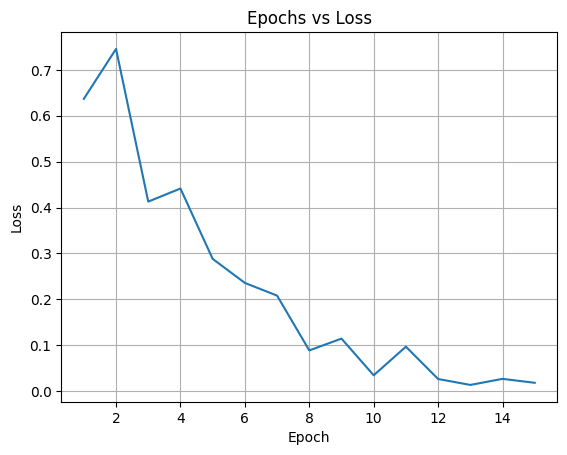

In [16]:
# prompt: make a plot showing the epochs vs loss

import matplotlib.pyplot as plt

# Assuming you have a list to store losses for each epoch
losses = [0.6368, 0.7455, 0.4129, 0.4414, 0.2882, 0.2358, 0.2081, 0.0888, 0.1145, 0.0346, 0.0969, 0.0265, 0.0136, 0.0268, 0.0182]  # Replace this with your actual loss values from the training loop

# Plot the epochs vs loss
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.grid(True)
plt.show()


In [17]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to track gradients
    for images, labels in val_loader:
        labels = labels.float().unsqueeze(1)
        outputs = model(images)
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")

Validation Accuracy: 64.29%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(img_tensor, title):
    img = img_tensor.permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        preds = (outputs > 0.5).float()
        for i in range(min(8, len(images))):  # Show 5 images
            label = "Plane" if labels[i] == 1 else "Not Plane"
            pred = "Plane" if preds[i] == 1 else "Not Plane"
            title = f"Label: {label} | Pred: {pred}"
            show_image(images[i], title)
        break  # Only show one batch